In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


Feature Importance Scores (PCA-IG mapped to original features):
Apr        0.514970
Feb        0.501455
May        0.358854
Jan        0.332714
Sep        0.299858
June       0.217350
Dec        0.183758
Mar        0.163577
Oct        0.073558
Aug        0.064560
Nov        0.052355
Station    0.019925
July       0.011201
dtype: float64


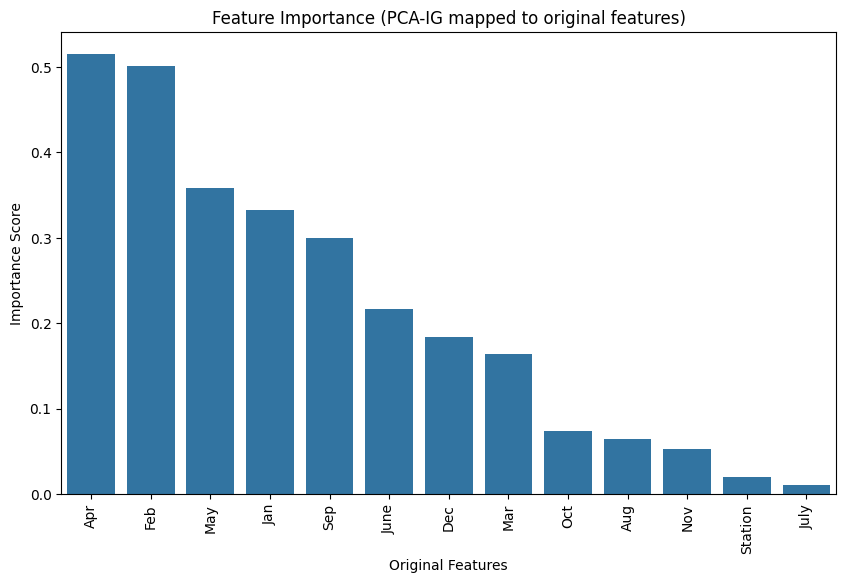

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
Apr        0.514970
Feb        0.501455
May        0.358854
Jan        0.332714
Sep        0.299858
June       0.217350
Dec        0.183758
Mar        0.163577
Oct        0.073558
Aug        0.064560
Nov        0.052355
Station    0.019925
July       0.011201
dtype: float64

Selected Top-10 Features:
Apr     0.514970
Feb     0.501455
May     0.358854
Jan     0.332714
Sep     0.299858
June    0.217350
Dec     0.183758
Mar     0.163577
Oct     0.073558
Aug     0.064560
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
Apr     0.514970
Feb     0.501455
May     0.358854
Jan     0.332714
Sep     0.299858
June    0.217350
dtype: float64

Cross-Validation Scores (MSE): [ 0.31557977  1.94509062  0.06356356  0.07844478 13.97781696]

Mean MSE: 3.2760991369154993


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Maximum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/maximum_linear_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using a regression model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
cv_scores = cross_val_score(regressor, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Feature Importance Scores (PCA-IG mapped to original features):
Apr        0.516798
Feb        0.501558
May        0.357176
Jan        0.333589
Sep        0.301305
June       0.220687
Dec        0.184094
Mar        0.163562
Oct        0.071755
Aug        0.063039
Nov        0.053079
Station    0.017570
July       0.011338
dtype: float64


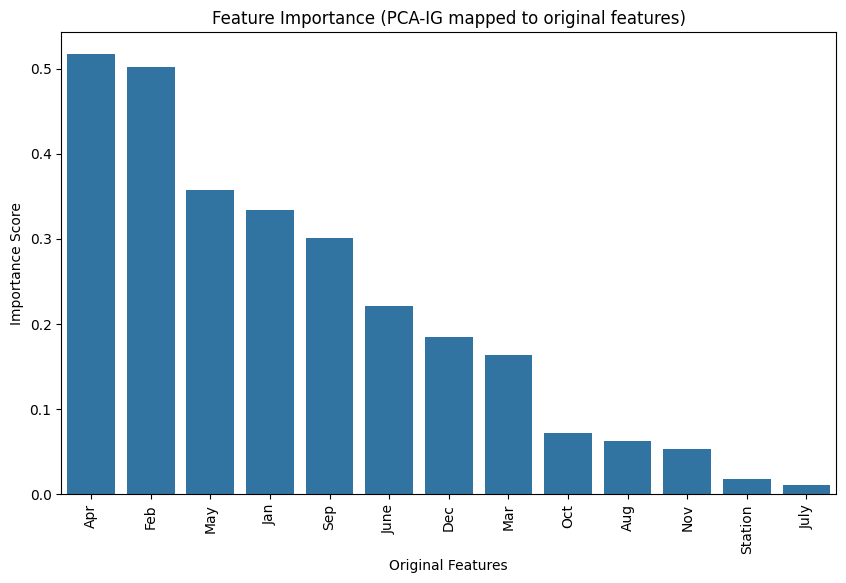

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
Apr        0.516798
Feb        0.501558
May        0.357176
Jan        0.333589
Sep        0.301305
June       0.220687
Dec        0.184094
Mar        0.163562
Oct        0.071755
Aug        0.063039
Nov        0.053079
Station    0.017570
July       0.011338
dtype: float64

Selected Top-10 Features:
Apr     0.516798
Feb     0.501558
May     0.357176
Jan     0.333589
Sep     0.301305
June    0.220687
Dec     0.184094
Mar     0.163562
Oct     0.071755
Aug     0.063039
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
Apr     0.516798
Feb     0.501558
May     0.357176
Jan     0.333589
Sep     0.301305
June    0.220687
dtype: float64

Cross-Validation Scores (MSE): [1.14537945e-01 4.73691077e-01 4.73344213e-02 1.30600106e-02
 1.39714960e+01]

Mean MSE: 2.9240238962579257


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Maximum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/maximum_ransac_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using RANSACRegressor
ransac = RANSACRegressor()

# Evaluate with cross-validation
cv_scores = cross_val_score(ransac, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Feature Importance Scores (PCA-IG mapped to original features):
Sep        0.149470
June       0.133977
May        0.099299
Aug        0.095549
Mar        0.080282
Feb        0.074772
Dec        0.072672
Apr        0.072304
Jan        0.049353
Station    0.041621
July       0.031185
Nov        0.010023
Oct        0.003194
dtype: float64


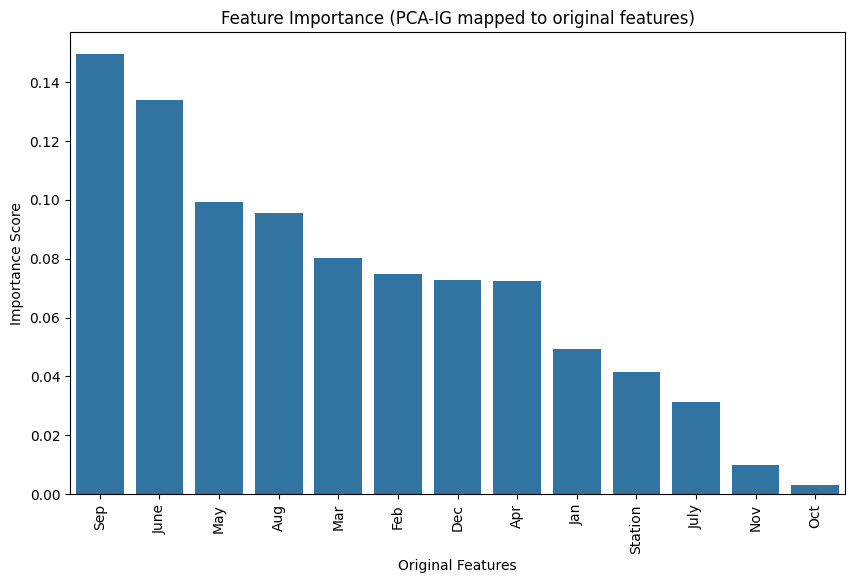

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
Sep        0.149470
June       0.133977
May        0.099299
Aug        0.095549
Mar        0.080282
Feb        0.074772
Dec        0.072672
Apr        0.072304
Jan        0.049353
Station    0.041621
July       0.031185
Nov        0.010023
Oct        0.003194
dtype: float64

Selected Top-10 Features:
Sep        0.149470
June       0.133977
May        0.099299
Aug        0.095549
Mar        0.080282
Feb        0.074772
Dec        0.072672
Apr        0.072304
Jan        0.049353
Station    0.041621
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
Sep     0.149470
June    0.133977
May     0.099299
Aug     0.095549
Mar     0.080282
Feb     0.074772
Dec     0.072672
dtype: float64

Cross-Validation Scores (MSE): [ 2.26339176  5.59617063  7.94572887  4.00983386 12.95796924]

Mean MSE: 6.554618870181031


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/minimum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/minimum_linear_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using a regression model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
cv_scores = cross_val_score(regressor, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Feature Importance Scores (PCA-IG mapped to original features):
Sep        0.149122
June       0.135647
May        0.097970
Aug        0.097511
Mar        0.080081
Dec        0.075607
Feb        0.074017
Apr        0.072316
Jan        0.048289
Station    0.042679
July       0.028980
Nov        0.007548
Oct        0.000982
dtype: float64


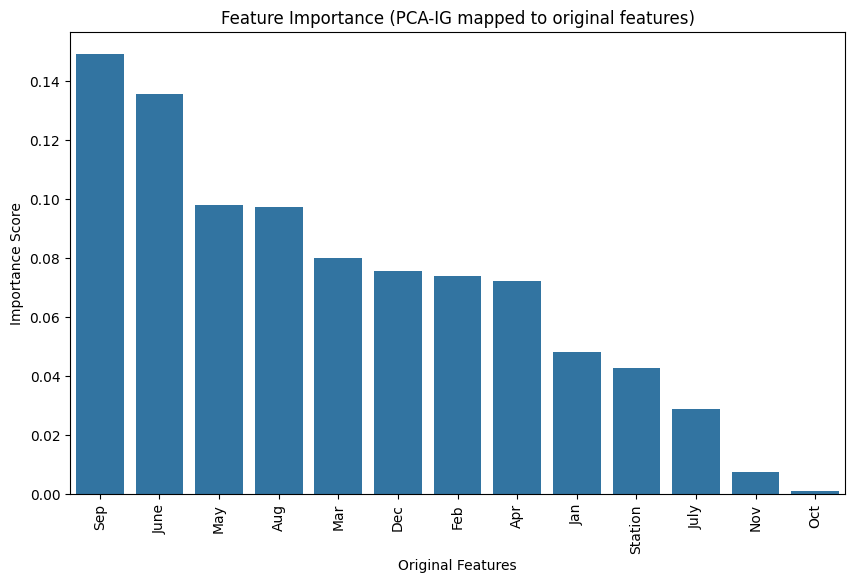

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
Sep        0.149122
June       0.135647
May        0.097970
Aug        0.097511
Mar        0.080081
Dec        0.075607
Feb        0.074017
Apr        0.072316
Jan        0.048289
Station    0.042679
July       0.028980
Nov        0.007548
dtype: float64

Selected Top-10 Features:
Sep        0.149122
June       0.135647
May        0.097970
Aug        0.097511
Mar        0.080081
Dec        0.075607
Feb        0.074017
Apr        0.072316
Jan        0.048289
Station    0.042679
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
Sep     0.149122
June    0.135647
May     0.097970
Aug     0.097511
Mar     0.080081
Dec     0.075607
Feb     0.074017
dtype: float64

Cross-Validation Scores (MSE): [ 0.83496341  4.17551382  8.43665086  4.04638942 13.46167403]

Mean MSE: 6.191038307239876


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/minimum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/minimum_ransac_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using RANSACRegressor
ransac = RANSACRegressor()

# Evaluate with cross-validation
cv_scores = cross_val_score(ransac, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Feature Importance Scores (PCA-IG mapped to original features):
June       0.484543
Apr        0.439856
Aug        0.430111
Mar        0.415580
July       0.332713
Sep        0.292961
Station    0.290928
Oct        0.276065
Dec        0.227421
Jan        0.092454
May        0.084355
Feb        0.071375
Nov        0.053133
dtype: float64


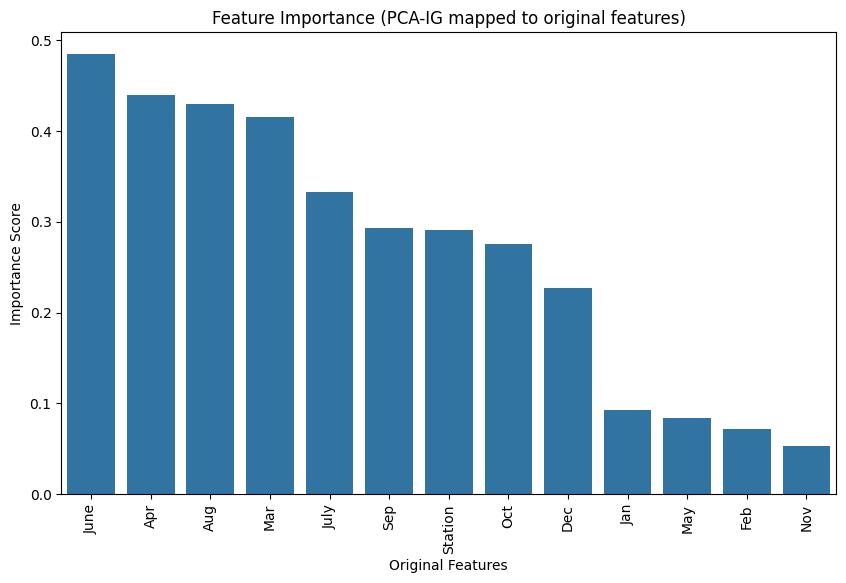

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
June       0.484543
Apr        0.439856
Aug        0.430111
Mar        0.415580
July       0.332713
Sep        0.292961
Station    0.290928
Oct        0.276065
Dec        0.227421
Jan        0.092454
May        0.084355
Feb        0.071375
Nov        0.053133
dtype: float64

Selected Top-10 Features:
June       0.484543
Apr        0.439856
Aug        0.430111
Mar        0.415580
July       0.332713
Sep        0.292961
Station    0.290928
Oct        0.276065
Dec        0.227421
Jan        0.092454
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
June       0.484543
Apr        0.439856
Aug        0.430111
Mar        0.415580
July       0.332713
Sep        0.292961
Station    0.290928
dtype: float64

Cross-Validation Scores (MSE): [206.0178521  233.59559626 214.63291832 151.53673382 238.46270501]

Mean MSE: 208.84916110230432


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Rainfall1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/rainfall_linear_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using a regression model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
cv_scores = cross_val_score(regressor, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Feature Importance Scores (PCA-IG mapped to original features):
June       0.484145
Apr        0.439986
Aug        0.430402
Mar        0.416084
July       0.332719
Sep        0.293106
Station    0.290867
Oct        0.276053
Dec        0.226641
Jan        0.092399
May        0.084666
Feb        0.071898
Nov        0.052747
dtype: float64


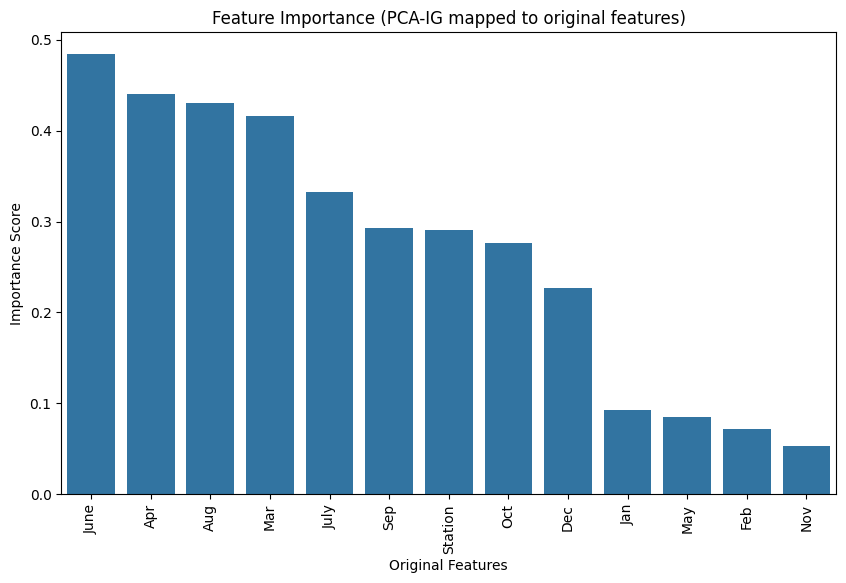

<Figure size 640x480 with 0 Axes>


Selected Features (Threshold-Based Selection):
June       0.484145
Apr        0.439986
Aug        0.430402
Mar        0.416084
July       0.332719
Sep        0.293106
Station    0.290867
Oct        0.276053
Dec        0.226641
Jan        0.092399
May        0.084666
Feb        0.071898
Nov        0.052747
dtype: float64

Selected Top-10 Features:
June       0.484145
Apr        0.439986
Aug        0.430402
Mar        0.416084
July       0.332719
Sep        0.293106
Station    0.290867
Oct        0.276053
Dec        0.226641
Jan        0.092399
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
June       0.484145
Apr        0.439986
Aug        0.430402
Mar        0.416084
July       0.332719
Sep        0.293106
Station    0.290867
dtype: float64

Cross-Validation Scores (MSE): [212.44967751 246.15300931 237.28954264 161.17574359 241.19874373]

Mean MSE: 219.65334335655908


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Rainfall1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Save plot to Google Drive as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/rainfall_ransac_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600)
plt.show()

# Cross-validation for feature importance evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Optionally: Apply the selected features to the regression model

# Example: Selecting features for modeling
X_selected = X[selected_features_top_n.index]

# Perform cross-validation using RANSACRegressor
ransac = RANSACRegressor()

# Evaluate with cross-validation
cv_scores = cross_val_score(ransac, X_selected, y, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Scores (MSE):", -cv_scores)
print("\nMean MSE:", -np.mean(cv_scores))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


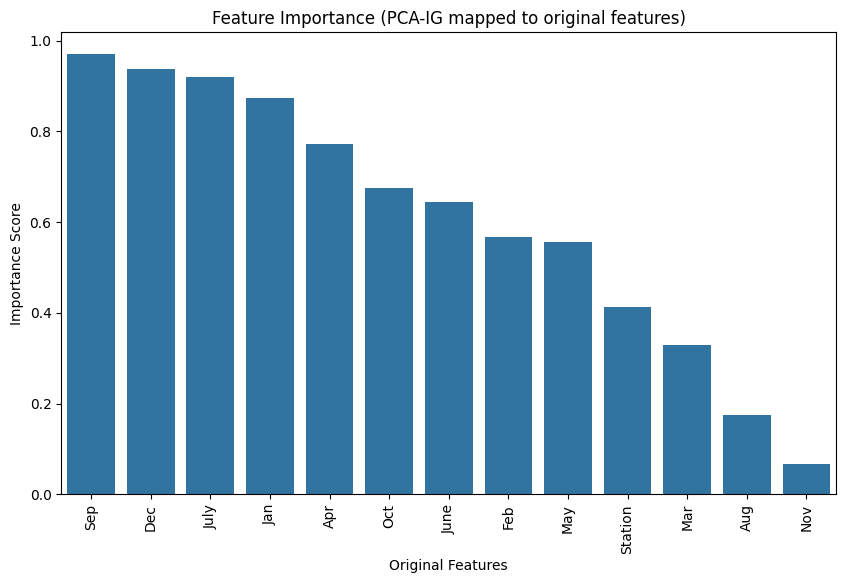

Plot saved successfully at: /content/drive/MyDrive/climate/maximum_feature_importance_plot.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Example: Simulating feature importance scores
# Replace this with your real feature importance scores (pca_ig_importance_series)
data = pd.read_csv('/content/drive/MyDrive/climate/Maximum1.csv')
X = data.drop('Year', axis=1)

# Here is a simulated feature importance series (replace it with your actual values)
pca_ig_importance_series = pd.Series(np.random.rand(X.shape[1]), index=X.columns).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

# Save the plot as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/maximum_feature_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600, bbox_inches='tight')
plt.show()

print(f"Plot saved successfully at: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


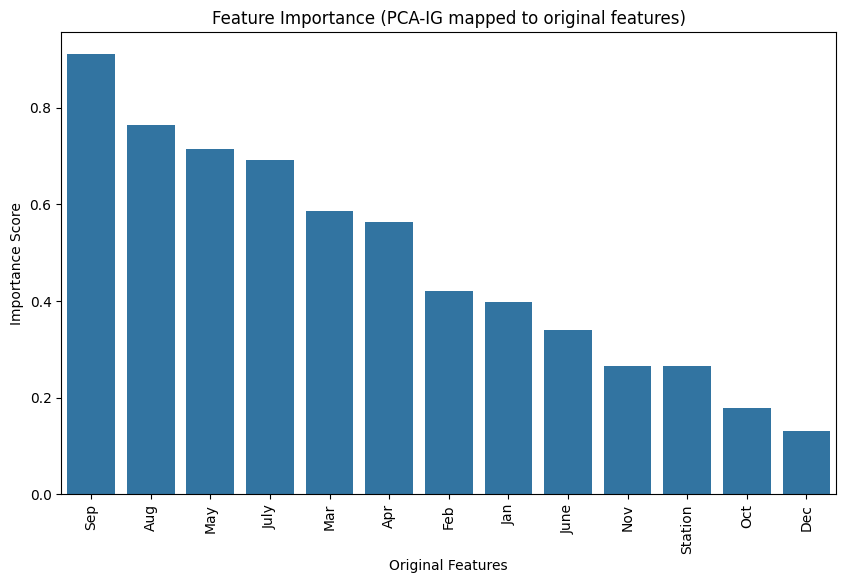

Plot saved successfully at: /content/drive/MyDrive/climate/minimum_feature_importance_plot.pdf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Example: Simulating feature importance scores
# Replace this with your real feature importance scores (pca_ig_importance_series)
data = pd.read_csv('/content/drive/MyDrive/climate/minimum1.csv')
X = data.drop('Year', axis=1)

# Here is a simulated feature importance series (replace it with your actual values)
pca_ig_importance_series = pd.Series(np.random.rand(X.shape[1]), index=X.columns).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

# Save the plot as a PDF with 600 DPI
save_path = '/content/drive/MyDrive/climate/minimum_feature_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600, bbox_inches='tight')
plt.show()

print(f"Plot saved successfully at: {save_path}")


Feature Importance Scores (PCA-IG mapped to original features):
Apr        0.514546
Feb        0.501160
May        0.356989
Jan        0.333085
Sep        0.299911
June       0.218677
Dec        0.184276
Mar        0.166977
Oct        0.072384
Aug        0.063699
Nov        0.051018
Station    0.018685
July       0.012940
dtype: float64


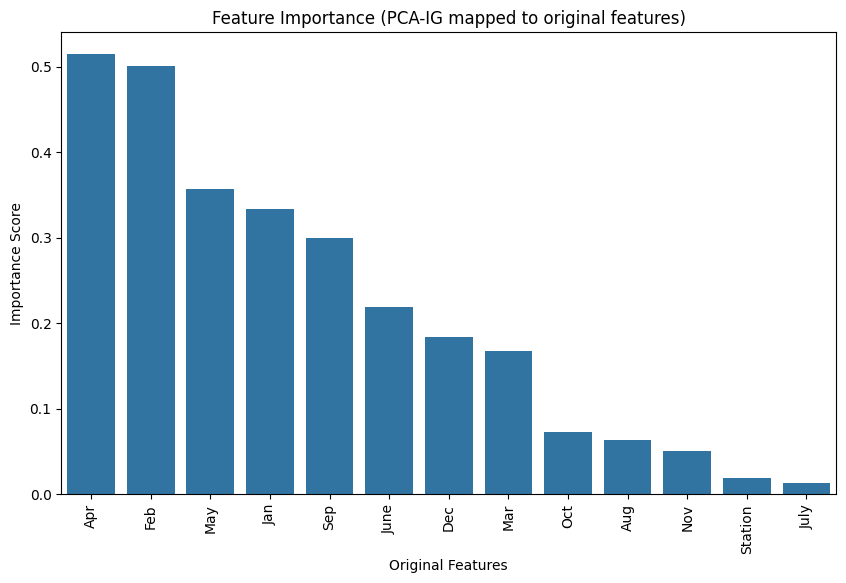

Plot saved successfully at: /content/drive/MyDrive/climate/maximum_feature_importance_plot1.pdf


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/Maximum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

# Save the plot as a PDF with 600 DPI before showing the plot
save_path = '/content/drive/MyDrive/climate/maximum_feature_importance_plot1.pdf'
plt.savefig(save_path, format='pdf', dpi=600, bbox_inches='tight')

# Now display the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")


Feature Importance Scores (PCA-IG mapped to original features):
Sep        0.150761
June       0.133862
May        0.098677
Aug        0.096677
Mar        0.076266
Dec        0.075291
Feb        0.072686
Apr        0.072441
Jan        0.047287
Station    0.042241
July       0.029374
Nov        0.007629
Oct        0.002991
dtype: float64


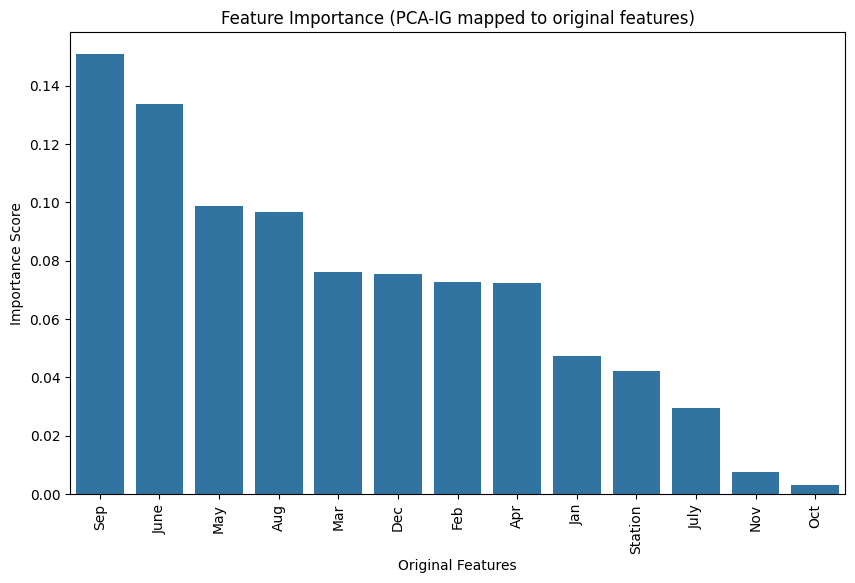

Plot saved successfully at: /content/drive/MyDrive/climate/minimum_feature_importance_plot.pdf


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/climate/minimum1.csv')

# Split features and target
X = data.drop('Year', axis=1)
y = data['Year']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information (for regression)
mi = mutual_info_regression(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

# Save the plot as a PDF with 600 DPI before showing the plot
save_path = '/content/drive/MyDrive/climate/minimum_feature_importance_plot.pdf'
plt.savefig(save_path, format='pdf', dpi=600, bbox_inches='tight')

# Now display the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")
